#Trabalho prático # 4
##Introdução à Computação Numérica

###Tópico: Integração numérica

---

Nome: Afonso Lustosa Pires Junior

DRE: 122079084


---

**Instruções:**

**Preencha o notebook** com seus dados, seus códigos e **rode todos os códigos**

**Inclua  um relatório, na parte final do notebook,** com suas conclusões, respostas, observações e comentários relacionados com os tópicos e questões abordadas nas tarefas.

**A elaboração dos códigos pode ser realizada em duplas, mas o resto do trabalho é individual.**

*Se você fez o seu trabalho em dupla inclua essa informação no relatório. Além disso, se você  também recebeu ajuda de um(a) colega/amigo(a) ou consultou/usou informações da internet ou outras fontes, coloque referências à elas no seu relatório.*


**Entrega do trabalho:**

*Data de entrega: 27/junho/2023*

---


## Tarefa #1

Implemente funções em Python para aproximar a integral definida
$$
I = \int_a^b f(x)\,dx,
$$
usando:
i) a regra dos trapézios repetida/composta;
ii) a regra de Simpson repetida/composta.

a) Considere como parâmetros de entrada o espaçamento $h$ entre os nós (pontos) que serão usados e uma lista com os valores da função nesses nós: $f_j = f(a+j\, h)$,  $j=0,\dots,n$.

b) Considere como parâmetros de entrada o intervalo $[a, b]$, a função $f$ e a quantidade de nós (pontos) que serão usados.

**Observação**: Você precisará implementar 4 funções.


Regra do trapézio:

In [ ]:
import numpy

def int_trapez_v1(h,f_values):  #Versão que utiliza uma lista de favores de f(x) e a variação h.
    n = len(f_values)
    result = h/2
    sum = 0
    for i in range(1,n-1):
        sum += f_values[i]
    result*=(f_values[0] + f_values[-1] + 2*sum)
    return result

def int_trapez_v2(func,a,b,n): #Versão que utiliza a definição da função, os limites de integração e o numero de nós.
    x_values = numpy.linspace(a,b,n+1)
    h = x_values[1] - x_values[0]
    result = h/2

    f_values = [ func(i) for i in x_values]

    sum = 0
    for i in range(1,n):
        sum += f_values[i]
    result*=(f_values[0] + f_values[-1] + 2*sum)
    return result


Regra de Simpson:

In [ ]:
def int_simpson_v1(h,f_val):   #Versão que utiliza uma lista de favores de f(x) e a variação h.
    n = len(f_val)
    resultado = h/3

    sum = f_val[0] + f_val[-1]
    i=1
    if(n%2==0):
        for i in range(1,n//2):
            sum+=(2*f_val[2*i-1] + 4*f_val[2*i-2])
        sum+= 4*f_val[2*i]
    else:
        for i in range(1,n//2):
            sum+=(2*f_val[2*i] + 4*f_val[2*i-1])
        i=n//2
        sum+= 4*f_val[2*i-1]

    resultado*=sum
    return resultado

def int_simpson_v2(func,a,b,n): #Versão que utiliza a definição da função, os limites de integração e o numero de nós.
    if(n%2==1):  #n precisa ser par
        n+=1

    x_list = numpy.linspace(a,b,n+1)
    f_val = [ func(i) for i in x_list]
    h = x_list[1] - x_list[0]

    sum = f_val[0] + f_val[-1]
    i=1
    for i in range(1,n//2):
        sum+=(2*f_val[2*i] + 4*f_val[2*i-1])
    i=n//2
    sum+= 4*f_val[2*i-1]

    resultado = sum * (h/3)
    return resultado


##Tarefa #2: Teste as funções implementadas

a) Procure uma função $f$ que não seja um polinômio e cuja integral definida pode ser calculada analiticamente (de forma exata) no intervalo escolhido.

b) Obtenha aproximações do valor da integral definida dessa função considerando $n=10$, $50$, $100$ e $200$ (note que a quantidade de nós em cada caso será igual a $n+1$). Para cada valor de $n$ obtenha aproximações usando suas implementações das regras dos trapézios e de Simpson.

c) Determine os erros absolutos associados com as aproximações obtidas no item a).

d) Comente e explique os resultados obtidos em b) e c).

###a)
Seja a função $f$ = $cos^2(x)$, cuja integral será avaliada no intervalo $[0,10]$.
A integral de $f$ será:
  
  $x/2 + sen(2x)/4$

que avaliado para $[0,10]$ será igual a $π/2 = 5.228236312681906916566276777302846312522888183593750$ (aproximadamente)

###b)


In [ ]:


# Definição de f = cos(x)²
def funcao(x):
    return (math.cos(x)**2)

n_list = [10,50,100,200]

f_int_trapez = []
f_int_simpson = []
for n in n_list:   #Obtendo os valores.
    f_int_trapez.append(int_trapez_v2(funcao,0,10,n))
    f_int_simpson.append(int_simpson_v2(funcao,0,10,n))
print("Valores para o método de Simpson, para n = 10,50,100,200\n",f_int_simpson)
print("\nValores para o método dos Trapézios, para n = 10,50,100,200\n",f_int_trapez)


Valores para o método de Simpson, para n = 10,50,100,200
 [5.265034516533649, 5.228269401808419, 5.228238351150669, 5.228236439630967]

Valores para o método dos Trapézios, para n = 10,50,100,200
 [5.146548851061131, 5.225185015738544, 5.227475017297637, 5.228046084047636]


Vemos que os valores para a Regra de Simpson foram mais precisos.

###c)


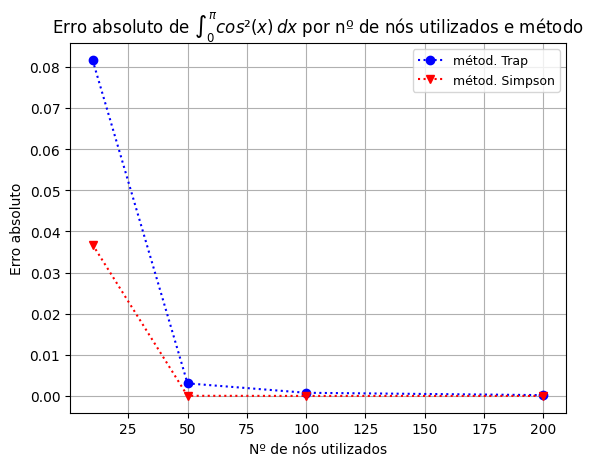

In [ ]:

ref_value = 1/4*(math.sin(20)) + 5

error_trap = [ math.fabs(ref_value - value) for value in f_int_trapez]
error_simp = [ math.fabs( ref_value - value) for value in f_int_simpson]

plt.title(u"Erro absoluto de $\int_{0}^{\pi} cos²(x) \,dx$ por nº de nós utilizados e método")
plt.plot(n_list,error_trap,"bo",label="métod. Trap",linestyle='dotted')
plt.plot(n_list,error_simp,"rv",label="métod. Simpson",linestyle='dotted')
plt.xlabel("Nº de nós utilizados")
plt.ylabel("Erro absoluto")
plt.legend(fontsize=9)
plt.grid()
plt.show()

###d)
Como vemos em sala, o erro no método dos Trapézios, relativo à $n$, é de ordem quadrática.
Enquanto que o erro no método de Simpson relativo a $n$ é de $4ª$ ordem.

Isto explica a maior precisão do método de Simpson em relação ao dos trapézios. Assim como o aumento de precisão conforme o aumento de $n$.

##Tarefa #3: Aplicação

A **integral de Fresnel C(x)** é uma função definida como
$$
\mathrm{C}(x) = \int_0^x \cos(\pi\,t^2/2)\,dt.
$$

a) Faça a implementação de uma função que determine o valor aproximado de $\mathrm{C}(x)$ para qualquer entrada $x$ com um erro absoluto menor que $10^{-8}$. Explique as ideias básicas da sua implementação no seu relatório.

b) Teste a função implementada comparando com os seguintes valores*:

i) $\mathrm{C}(-2) = -0.48825340607534075450$,

ii) $\mathrm{C}(0.5) = 0.49234422587144639288$,

iii) $\mathrm{C}(1) = 0.77989340037682282947$,

iv) $\mathrm{C}(5) = 0.56363118870401223110$.

*Os valores apresentados foram calculados com 16 dígitos de precisão.




In [ ]:
import math
import numpy



#Definindo a função interior à integral de Fresnel:

def interior_fresnel(t):
    return math.cos((t**2)*(math.pi/2))


#Definindo a 4a derivada da função, para o calculo de M4 (na formula do erro).
def f4_dx(x):
    resultado = 0
    resultado += -3*((math.pi)**2)*(math.cos((1/2)*math.pi*(x**2)))
    resultado += 6*(math.pi**3)*(x**2)*(math.sin((1/2)*math.pi*(x**2)))
    resultado += (math.pi**4)*(x**4)*(math.cos((1/2)*math.pi*(x**2)))
    return resultado

# Definindo  a integral de fresnel
def fresnel(x):
    #determinar maior valor da 4ª derivada no intervalo [0,x]
    if(x<0):
        x_test = numpy.linspace(x,0,1001)
    else:
        x_test = numpy.linspace(0,x,1001)

    y_test = [ math.fabs(f4_dx(i)) for i in x_test ]
    max_val = max(y_test)

    # Determinar o melhor valor de n para erro < 10⁻⁸
    n = math.fabs((max_val*(x**5)*(10**7))/18)**(1/4)
    n = (int)(n//1) + 1

    print("[Avaliando C(x) para x = {}   e   n = {}]".format(x,n))
    return int_simpson_v2(interior_fresnel,0,x,n**2)

###b)

[Avaliando C(x) para x = -2   e   n = 407]
[Avaliando C(x) para x = 0.5   e   n = 27]
[Avaliando C(x) para x = 1   e   n = 101]
[Avaliando C(x) para x = 5   e   n = 3148]


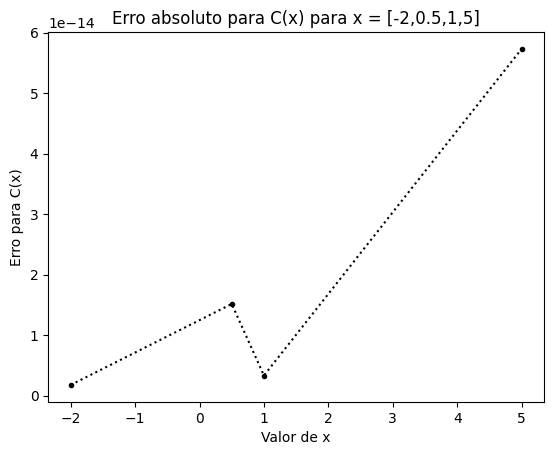

In [ ]:


#Determinando valores de x
x_values = [-2,0.5,1,5]
f_values = [fresnel(i) for i in x_values]
#Calculando erros
error = []
error.append( math.fabs( -0.48825340607534075450 - f_values[0]) )
error.append( math.fabs( 0.49234422587144639288 - f_values[1]) )
error.append( math.fabs( 0.77989340037682282947 - f_values[2]) )
error.append( math.fabs( 0.56363118870401223110 - f_values[3]) )
#Plotando gráfico
plt.title("Erro absoluto para C(x) para x = [-2,0.5,1,5]")
plt.xlabel("Valor de x")
plt.ylabel("Erro para C(x)")
plt.plot(x_values,error, "k.",linestyle='dotted')
plt.show()

Onde vemos todos os erros menores que $6 \cdot 1e-14$

## Relatório
###Tarefa 1)
As funções que recebem a função,o intervalo da integral a ser cálculada e o número $n$, foram implementadas de forma quase idênticas à função que recebe $h$ e os dados numéricos da função. Os dados foram calculados no intervalo dado com o número de nós sendo $n+1$, e a mesma implementação da outra função foi utilizada.
###Tarefa 3)

####Item c:
Foi utilizado a Regra de Simpson composta para o cálculo da integral.

Para termos um erro $E$ menor que $10^{-8}$, foi preciso estimar um valor de $n$ tal que,  ( segundo a definição do erro $E$ na Regra de Simpson Composta) :    

$\LARGE \frac{ M_{4}\cdot x^{5} }{180n^{4}} < 10^{-8}$

isto é:

$\LARGE \frac{M_{4}\cdot x^{5} \cdot 10^{7} }{18} < n^4$

logo, no código, fiz com que:

$\LARGE n = (\frac{M_{4}\cdot x^{5} \cdot 10^{7} }{18})^{1/4} +1$

onde

$\large M_4 = \underset{i  \in [0,x]}{Max}\left |f^{(4)}(i)  \right |$

E $M_4$ foi avaliado obtendo o maximo de 1001 valores da 4ª derivada de  $\mathrm \cos(\pi\,t^2/2)$ no intervalo $[0,x]$ especificado.



